In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
plt.style.use('ggplot')

In [3]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [4]:
SALES_DATA=pd.read_csv('SALES_DATA.csv')

In [5]:
SALES_DATA.info()
SALES_DATA.head(10)
SALES_DATA.columns

# There is no missing value 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 566309 entries, 0 to 566308
Data columns (total 16 columns):
InvoiceNo           566309 non-null object
StockCode           566309 non-null object
Quantity Shipped    566309 non-null float64
Year                566309 non-null object
Invoice Date        566309 non-null object
UnitPrice           566309 non-null float64
Ext-Price           566309 non-null float64
CustomerID          566309 non-null int64
Country             566309 non-null object
GM%                 566309 non-null object
Shipper             566309 non-null object
COST                566309 non-null object
EXT COST            566309 non-null float64
REGION              566309 non-null object
SALES P             566309 non-null object
Unnamed: 15         166199 non-null float64
dtypes: float64(5), int64(1), object(10)
memory usage: 69.1+ MB


,InvoiceNo,StockCode,Quantity Shipped,Year,Invoice Date,UnitPrice,Ext-Price,CustomerID,Country,GM%,Shipper,COST,EXT COST,REGION,SALES P,Unnamed: 15
0,568200,PADS,5.000,"2,017",09/25/17,1.000,5.00,16198,United Kingdom,0%,Delivery Truck,1,4.999763,SOUTH,GRACE J,NaN
1,568375,BANK CHARGES,5.000,"2,017",09/26/17,1.000,5.00,13405,United Kingdom,100%,UPS Next day Air,-,0.000000,WEST,JEFF Y,NaN
2,561226,PADS,5.000,"2,017",07/26/17,1.000,5.00,15618,United Kingdom,0%,Delivery Truck,1,4.999763,SOUTH,GRACE J,NaN
3,2550193,PADS,7.080,"2,018",06/08/18,1.000,7.08,13952,United Kingdom,0%,UPS ground 2nd day,1,7.079664,CENTRAL,PETER T,NaN
4,550193,PADS,5.000,"2,017",04/15/17,1.000,5.00,13952,United Kingdom,0%,UPS ground 2nd day,1,4.999763,CENTRAL,PETER T,NaN
5,561047,16045,1.075,"2,017",07/24/17,1.004,1.08,16948,United Kingdom,0%,UPS ground 2nd day,1.01,1.080605,WEST,JEFF Y,NaN
6,560259,16045,6.450,"2,017",07/17/17,1.007,6.50,13654,United Kingdom,0%,UPS Next day Air,1.01,6.483628,CENTRAL,GAIL H,NaN
7,2558389,16045,46.956,"2,018",07/09/18,1.001,47.00,14383,United Kingdom,0%,UPS Next day Air,1.01,47.200809,SOUTH,GRACE J,NaN
8,558389,16045,3.225,"2,017",06/29/17,1.012,3.26,14383,United Kingdom,1%,UPS Next day Air,1.01,3.241814,SOUTH,GRACE J,NaN
9,C536757,84347,2.000,"2,016",12/02/16,1.003,2.01,15838,United Kingdom,24%,UPS ground 2nd day,0.76,1.522598,NORTH,JOHN A,NaN


Index(['InvoiceNo', 'StockCode', 'Quantity Shipped', 'Year', 'Invoice Date',
       'UnitPrice', 'Ext-Price', 'CustomerID', 'Country', 'GM%', 'Shipper',
       'COST', 'EXT COST', 'REGION', 'SALES P', 'Unnamed: 15'],
      dtype='object')

In [6]:
del SALES_DATA['Unnamed: 15']

In [7]:
SALES_DATA=SALES_DATA[SALES_DATA['Invoice Date']!='2/29/2018']

SALES_DATA.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 566076 entries, 0 to 566308
Data columns (total 15 columns):
InvoiceNo           566076 non-null object
StockCode           566076 non-null object
Quantity Shipped    566076 non-null float64
Year                566076 non-null object
Invoice Date        566076 non-null object
UnitPrice           566076 non-null float64
Ext-Price           566076 non-null float64
CustomerID          566076 non-null int64
Country             566076 non-null object
GM%                 566076 non-null object
Shipper             566076 non-null object
COST                566076 non-null object
EXT COST            566076 non-null float64
REGION              566076 non-null object
SALES P             566076 non-null object
dtypes: float64(4), int64(1), object(10)
memory usage: 69.1+ MB


In [8]:
SALES_DATA['Invoice Date'] = pd.to_datetime(SALES_DATA['Invoice Date'])

lat_date=SALES_DATA['Invoice Date'].max()
print('The latest invoice date is:', lat_date)
ear_date=SALES_DATA['Invoice Date'].min()
print('The earliest invoice date is:', ear_date)

The latest invoice date is: 2018-12-27 00:00:00
The earliest invoice date is: 2016-12-01 00:00:00


In [9]:
cust=SALES_DATA[['CustomerID']].drop_duplicates()
print("No of customers are:", len(cust))

No of customers are: 4146


In [10]:
coun=SALES_DATA['Country'].drop_duplicates()
print("No of countires are:", len(coun))

SALES_DATA['Country'].unique()

No of countires are: 38


array(['United Kingdom', 'EIRE', 'Germany', 'France', 'Israel', 'Austria',
       'Norway', 'Finland', 'Spain', 'Belgium', 'Switzerland', 'Portugal',
       'Netherlands', 'Singapore', 'Japan', 'Sweden', 'Malta', 'Greece',
       'Hong Kong', 'Unspecified', 'Cyprus', 'Canada',
       'United Arab Emirates', 'Australia', 'Italy', 'Channel Islands',
       'Denmark', 'USA', 'Poland', 'Iceland', 'Czech Republic', 'RSA',
       'European Community', 'Lebanon', 'Saudi Arabia', 'Lithuania',
       'Bahrain', 'Brazil'], dtype=object)

In [11]:
# Checking country wise customer distribution:

In [12]:
cust_country=SALES_DATA[['Country','CustomerID']].drop_duplicates()

cust_country_count=cust_country.groupby(['Country'])['CustomerID'].aggregate('count').reset_index().sort_values('CustomerID',ascending=False)
cust_country_count

,Country,CustomerID
36,United Kingdom,3753
14,Germany,91
13,France,88
10,EIRE,31
31,Spain,30
3,Belgium,24
33,Switzerland,22
27,Portugal,18
19,Italy,13
12,Finland,11


<Figure size 864x576 with 0 Axes>

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37]), <a list of 38 Text xticklabel objects>)

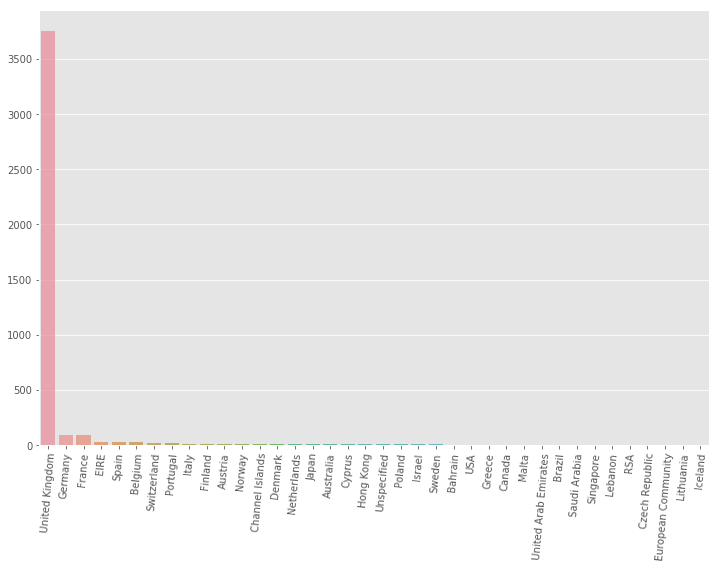

In [13]:
country=list(cust_country_count['Country'])
cust_id=list(cust_country_count['CustomerID'])
plt.figure(figsize=(12,8))
sns.barplot(country, cust_id, alpha=0.8)
plt.xticks(rotation='85')

# It can be seen from the graph that around 90% of the customers exist in United Kingdom only followed by Germany and France. 

In [14]:
sales_data_UK=SALES_DATA.loc[SALES_DATA['Country']=='United Kingdom']

In [15]:
columns=['InvoiceNo', 'StockCode','Invoice Date', 'CustomerID', 'Country', 'Shipper', 'REGION', 'SALES P']

In [16]:
def unique_counts(df):
    for i in columns:
        counts=df[i].nunique()
        print(i, ": ", counts)
unique_counts(sales_data_UK)

InvoiceNo :  22742
StockCode :  3894
Invoice Date :  656
CustomerID :  3753
Country :  1
Shipper :  4
REGION :  4
SALES P :  6


In [17]:
# Recency (R): 

In [18]:
cust_date=SALES_DATA[['CustomerID','Invoice Date']].drop_duplicates()

In [19]:
import datetime as dt
l1=dt.datetime(2017,4,30)
l2=dt.datetime(2017,9,30)
l3=dt.datetime(2018,2,28)
l4=dt.datetime(2018,7,31)

In [20]:
def f(row):
    if row['Invoice Date'] <= l1:
        val = 1
    elif row['Invoice Date'] > l1 and row['Invoice Date'] <= l2:
        val = 2
    elif row['Invoice Date'] > l2 and row['Invoice Date'] <= l3:
        val = 3
    elif row['Invoice Date'] > l3 and row['Invoice Date'] <= l4:
        val = 4
    else:
        val = 5
    return val

In [21]:
cust_date['Recency_Flag']=cust_date.apply(f, axis=1)
cust_date=cust_date.groupby('CustomerID', as_index=False)['Recency_Flag'].max()

In [22]:
cust_date['Recency_Flag'].value_counts()

5    2277
3     992
2     463
4     311
1     103
Name: Recency_Flag, dtype: int64

<Figure size 864x576 with 0 Axes>

Text(0,0.5,'Count')

Text(0.5,0,'Recency_Flag')

Text(0.5,1,'Frequency of Recency_Flag')

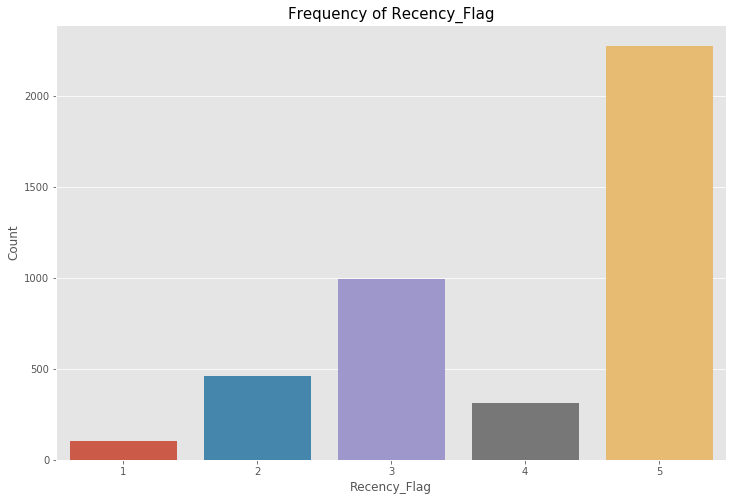

In [23]:
plt.figure(figsize=(12,8))
sns.countplot(x='Recency_Flag', data=cust_date)
plt.ylabel('Count', fontsize=12)
plt.xlabel('Recency_Flag', fontsize=12)
plt.title('Frequency of Recency_Flag', fontsize=15)

In [24]:
# Frequency (F):

In [25]:
cust_freq=SALES_DATA[['Country','InvoiceNo','CustomerID']].drop_duplicates()

cust_freq_count=cust_freq.groupby(['CustomerID'])['InvoiceNo'].aggregate('count').reset_index().sort_values(by='InvoiceNo', ascending=False)

In [26]:
unique_invoice=cust_freq_count[['InvoiceNo']].drop_duplicates()
unique_invoice['Frequency_Band']=pd.qcut(unique_invoice['InvoiceNo'], 5)
unique_invoice=unique_invoice[['Frequency_Band']].drop_duplicates()
unique_invoice

,Frequency_Band
312,"(67.4, 250.0]"
425,"(44.8, 67.4]"
853,"(30.2, 44.8]"
2688,"(15.6, 30.2]"
2305,"(0.999, 15.6]"


In [27]:
def f(row):
    if row['InvoiceNo'] <= 15:
        val = 1
    elif row['InvoiceNo'] > 15 and row['InvoiceNo'] <= 30:
        val = 2
    elif row['InvoiceNo'] > 30 and row['InvoiceNo'] <= 44:
        val = 3
    elif row['InvoiceNo'] > 44 and row['InvoiceNo'] <= 67:
        val = 4
    else:
        val = 5
    return val

In [28]:
cust_freq_count['Freq_Flag']=cust_freq_count.apply(f, axis=1)

In [29]:
cust_freq_count['Freq_Flag'].value_counts()

1    3812
2     231
3      61
4      26
5      16
Name: Freq_Flag, dtype: int64

<Figure size 864x576 with 0 Axes>

Text(0,0.5,'Count')

Text(0.5,0,'Freq_Flag')

Text(0.5,1,'Frequency of Freq_Flag')

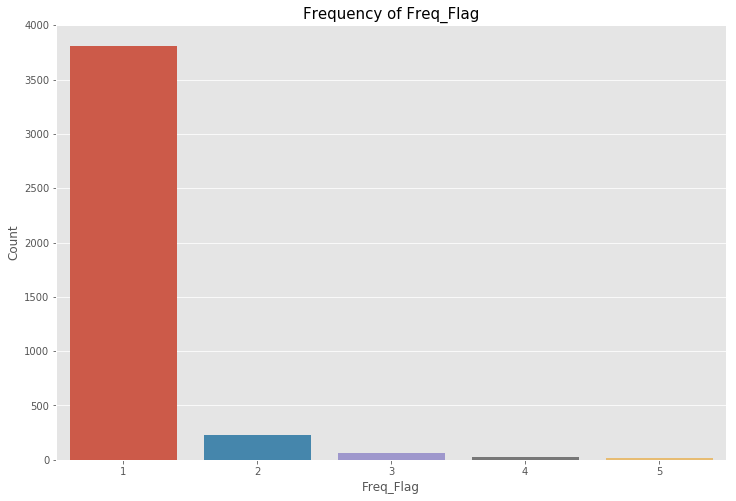

In [30]:
plt.figure(figsize=(12,8))
sns.countplot(x='Freq_Flag', data=cust_freq_count)
plt.ylabel('Count', fontsize=12)
plt.xlabel('Freq_Flag', fontsize=12)
plt.title('Frequency of Freq_Flag', fontsize=15)

In [31]:
# Monetary Value (M):

In [32]:
cust_monetory=SALES_DATA.groupby(['CustomerID'])['Ext-Price'].aggregate('sum').reset_index().sort_values(by='Ext-Price', ascending=False)

In [33]:
unique_price=cust_monetory[['Ext-Price']].drop_duplicates()
unique_price['monetory_Band']=pd.qcut(unique_price['Ext-Price'], 5)
unique_price=unique_price[['monetory_Band']].drop_duplicates()
unique_price

,monetory_Band
1631,"(9171.64, 992688.48]"
3937,"(3191.57, 9171.64]"
1262,"(1245.31, 3191.57]"
3925,"(451.86, 1245.31]"
278,"(1.0190000000000001, 451.86]"


In [34]:
def f(row):
    if row['Ext-Price'] <= 451:
        val = 1
    elif row['Ext-Price'] > 451 and row['Ext-Price'] <= 1245:
        val = 2
    elif row['Ext-Price'] > 1245 and row['Ext-Price'] <= 3191:
        val = 3
    elif row['Ext-Price'] > 3191 and row['Ext-Price'] <= 9171:
        val = 4
    else:
        val = 5
    return val

In [35]:
cust_monetory['Monetory_Flag']=cust_monetory.apply(f, axis=1)

In [36]:
cust_monetory['Monetory_Flag'].value_counts()

1    831
3    829
2    829
5    829
4    828
Name: Monetory_Flag, dtype: int64

<Figure size 864x576 with 0 Axes>

Text(0,0.5,'Count')

Text(0.5,0,'Monetory_Flag')

Text(0.5,1,'Frequency of Monetory_Flag')

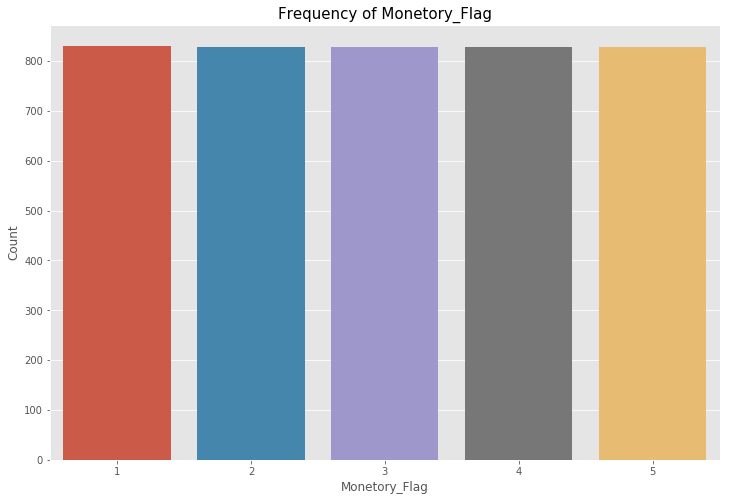

In [37]:
plt.figure(figsize=(12,8))
sns.countplot(x='Monetory_Flag', data=cust_monetory)
plt.ylabel('Count', fontsize=12)
plt.xlabel('Monetory_Flag', fontsize=12)
plt.title('Frequency of Monetory_Flag', fontsize=15)

In [38]:
NOW=dt.datetime(2018,12,27)

In [39]:
rfmTable=SALES_DATA.groupby('CustomerID').agg({'Invoice Date': lambda x: (NOW - x.max()).days, 'InvoiceNo': lambda x: len(x), 'Ext-Price': lambda x: x.sum()})
rfmTable['Invoice Date']=rfmTable['Invoice Date'].astype(int)
rfmTable.rename(columns={'Invoice Date': 'Recency', 
                         'InvoiceNo': 'Frequency', 
                         'Ext-Price': 'Monetary_value'}, inplace=True)
rfmTable.head(10)

,Recency,Frequency,Monetary_value
CustomerID,,,
12346,232,2,750867.97
12347,21,221,22725.40
12348,12,50,20105.77
12349,401,69,982.19
12350,148,33,1000.91
12352,100,73,1861.92
12353,82,8,371.31
12354,69,105,18197.91
12355,51,12,1793.56


In [40]:
cust_All=pd.merge(cust_date,cust_freq_count[['CustomerID','Freq_Flag']],on=['CustomerID'])
cust_All=pd.merge(cust_All,cust_monetory[['CustomerID','Monetory_Flag']],on=['CustomerID'])
cust_All.head(10)

,CustomerID,Recency_Flag,Freq_Flag,Monetory_Flag
0,12346,4,1,5
1,12347,5,1,5
2,12348,5,1,5
3,12349,3,1,2
4,12350,5,1,2
5,12352,5,1,3
6,12353,5,1,1
7,12354,5,1,5
8,12355,5,1,3
9,12356,5,1,4


In [41]:
segmented_rfm=pd.merge(rfmTable,cust_All,on=['CustomerID'])
segmented_rfm.head(10)

,CustomerID,Recency,Frequency,Monetary_value,Recency_Flag,Freq_Flag,Monetory_Flag
0,12346,232,2,750867.97,4,1,5
1,12347,21,221,22725.40,5,1,5
2,12348,12,50,20105.77,5,1,5
3,12349,401,69,982.19,3,1,2
4,12350,148,33,1000.91,5,1,2
5,12352,100,73,1861.92,5,1,3
6,12353,82,8,371.31,5,1,1
7,12354,69,105,18197.91,5,1,5
8,12355,51,12,1793.56,5,1,3
9,12356,92,50,3257.31,5,1,4


In [42]:
segmented_rfm['RFMScore']=segmented_rfm['Recency_Flag'].map(str)+segmented_rfm['Freq_Flag'].map(str)+segmented_rfm['Monetory_Flag'].map(str)
segmented_rfm.head(10)

,CustomerID,Recency,Frequency,Monetary_value,Recency_Flag,Freq_Flag,Monetory_Flag,RFMScore
0,12346,232,2,750867.97,4,1,5,415
1,12347,21,221,22725.40,5,1,5,515
2,12348,12,50,20105.77,5,1,5,515
3,12349,401,69,982.19,3,1,2,312
4,12350,148,33,1000.91,5,1,2,512
5,12352,100,73,1861.92,5,1,3,513
6,12353,82,8,371.31,5,1,1,511
7,12354,69,105,18197.91,5,1,5,515
8,12355,51,12,1793.56,5,1,3,513
9,12356,92,50,3257.31,5,1,4,514


In [43]:
# The top 10 customers of the company
segmented_rfm[segmented_rfm['RFMScore']=='555'].sort_values('Monetary_value',ascending=False).head(10)

,CustomerID,Recency,Frequency,Monetary_value,Recency_Flag,Freq_Flag,Monetory_Flag,RFMScore
1631,14646,5,2471,992688.48,5,5,5,555
1812,14911,5,5992,588004.51,5,5,5,555
2594,16029,2,2072,481705.99,5,5,5,555
3835,17841,2,8854,391481.22,5,5,5,555
954,13694,9,2117,280134.23,5,5,5,555
95,12471,8,3456,267628.11,5,5,5,555
537,13089,8,2280,251996.90,5,5,5,555
760,13408,7,2039,247207.52,5,5,5,555
1010,13767,7,2992,218324.34,5,5,5,555
1602,14606,2,4174,200748.86,5,5,5,555


In [44]:
# Key RFM segments
segmented_rfm['RFMScore'].value_counts()

514    630
513    483
515    462
311    357
312    335
512    248
211    229
525    198
313    193
212    159
511    120
413     82
314     76
411     70
412     68
414     62
535     60
111     55
213     49
524     32
315     31
415     29
545     26
214     22
113     21
112     19
555     16
114      5
215      4
115      3
534      1
523      1
Name: RFMScore, dtype: int64

In [45]:
def f(row):
    if 4 <= row['Recency_Flag'] <= 5 and 4 <= row['FM_Mean'] <= 5:
        val = 'Champions'
    elif 2 <= row['Recency_Flag'] <= 5 and 3 <= row['FM_Mean'] <= 5:
        val = 'Loyal Customers'
    elif 3 <= row['Recency_Flag'] <= 5 and 1 <= row['FM_Mean'] <= 3:
        val = 'Potential Loyalist'
    elif 4 <= row['Recency_Flag'] <= 5 and 0 <= row['FM_Mean'] <= 1:
        val = 'Recent Customers'
    elif 3 <= row['Recency_Flag'] <= 4 and 0 <= row['FM_Mean'] <= 1:
        val = 'Promising'
    elif 2 <= row['Recency_Flag'] <= 3 and 2 <= row['FM_Mean'] <= 3:
        val = 'Customers Needing Attention'
    elif 2 <= row['Recency_Flag'] <= 3 and 0 <= row['FM_Mean'] <= 2:
        val = 'About To Sleep'
    elif 0 <= row['Recency_Flag'] <= 2 and 2 <= row['FM_Mean'] <= 5:
        val = 'At Risk'
    elif 0 <= row['Recency_Flag'] <= 1 and 4 <= row['FM_Mean'] <= 5:
        val = 'Can’t Lose Them'
    elif 1 <= row['Recency_Flag'] <= 2 and 1 <= row['FM_Mean'] <= 2:
        val = 'Hibernating' 
    elif 0 <= row['Recency_Flag'] <= 2 and 0 <= row['FM_Mean'] <= 2:
        val = 'Lost' 
    return val

In [46]:
segmented_rfm.insert(7,'FM_Mean',(segmented_rfm['Freq_Flag'] + segmented_rfm['Monetory_Flag'])/2)

In [47]:
segmented_rfm['Segment']=segmented_rfm.apply(f, axis=1)

In [48]:
segmented_rfm.groupby('Segment').count()['CustomerID']

Segment
About To Sleep                  388
At Risk                          29
Champions                       102
Customers Needing Attention      71
Hibernating                      74
Loyal Customers                 757
Potential Loyalist             2725
Name: CustomerID, dtype: int64

In [49]:
def f(row):
    if row['Segment'] == 'Champions':
        val = 'Give rewards; Build credibility; Promote New Products'
    elif row['Segment'] == 'Loyal Customers':
        val = 'Take feedbacks and surveys; Upsell your products; Present Bonuses'
    elif row['Segment'] == 'Potential Loyalist':
        val = 'Offer loyalty program; Run contests; Make them feel special'
    elif row['Segment'] == 'Customers Needing Attention':
        val = 'Offer combo products; Get Nostalgic; Play a Prank'
    elif row['Segment'] == 'About To Sleep':
        val = 'Share valuable resource; Give your competitor analysis; Give relevant updates'
    elif row['Segment'] == 'At Risk':
        val = 'Offer Credit; Provide a wishlist; Upgrade offers'
    elif row['Segment'] == 'Hibernating': 
        val = 'Decide if you want them back; Review your product; Send personalized campaign'
    return val

In [50]:
segmented_rfm['Strategy']=segmented_rfm.apply(f, axis=1)

In [51]:
segmented_rfm.to_csv('customer_segment.csv',index=False)